In [4]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="7"

from fix_path import fix_python_path_if_working_locally
fix_python_path_if_working_locally()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from utils.load_data import load_part_grid_data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# load all internet data in both mins and hour period
milan_grid_data, milan_data = load_part_grid_data('../data/sms-call-internet-mi/', file_name='milan_internet_all_data.csv.gz', col1=51, col2=60, row1=51, row2=60)
mialn_grid_data_hour, milan_data_hour = load_part_grid_data('../data/sms-call-internet-mi/', file_name='milan_internet_all_data.csv.gz', aggre_time='hour', col1=51, col2=60, row1=51, row2=60)

loaded 8640 rows and 100 grids
loaded 1440 rows and 100 grids


In [5]:
milan_grid_data = milan_grid_data.reshape(-1, 144, milan_grid_data.shape[1])
mialn_grid_data_hour = mialn_grid_data_hour.reshape(-1, 24, mialn_grid_data_hour.shape[1])

In [7]:
milan_grid_data.shape

(60, 144, 100)

# Aggregate Period Analysis

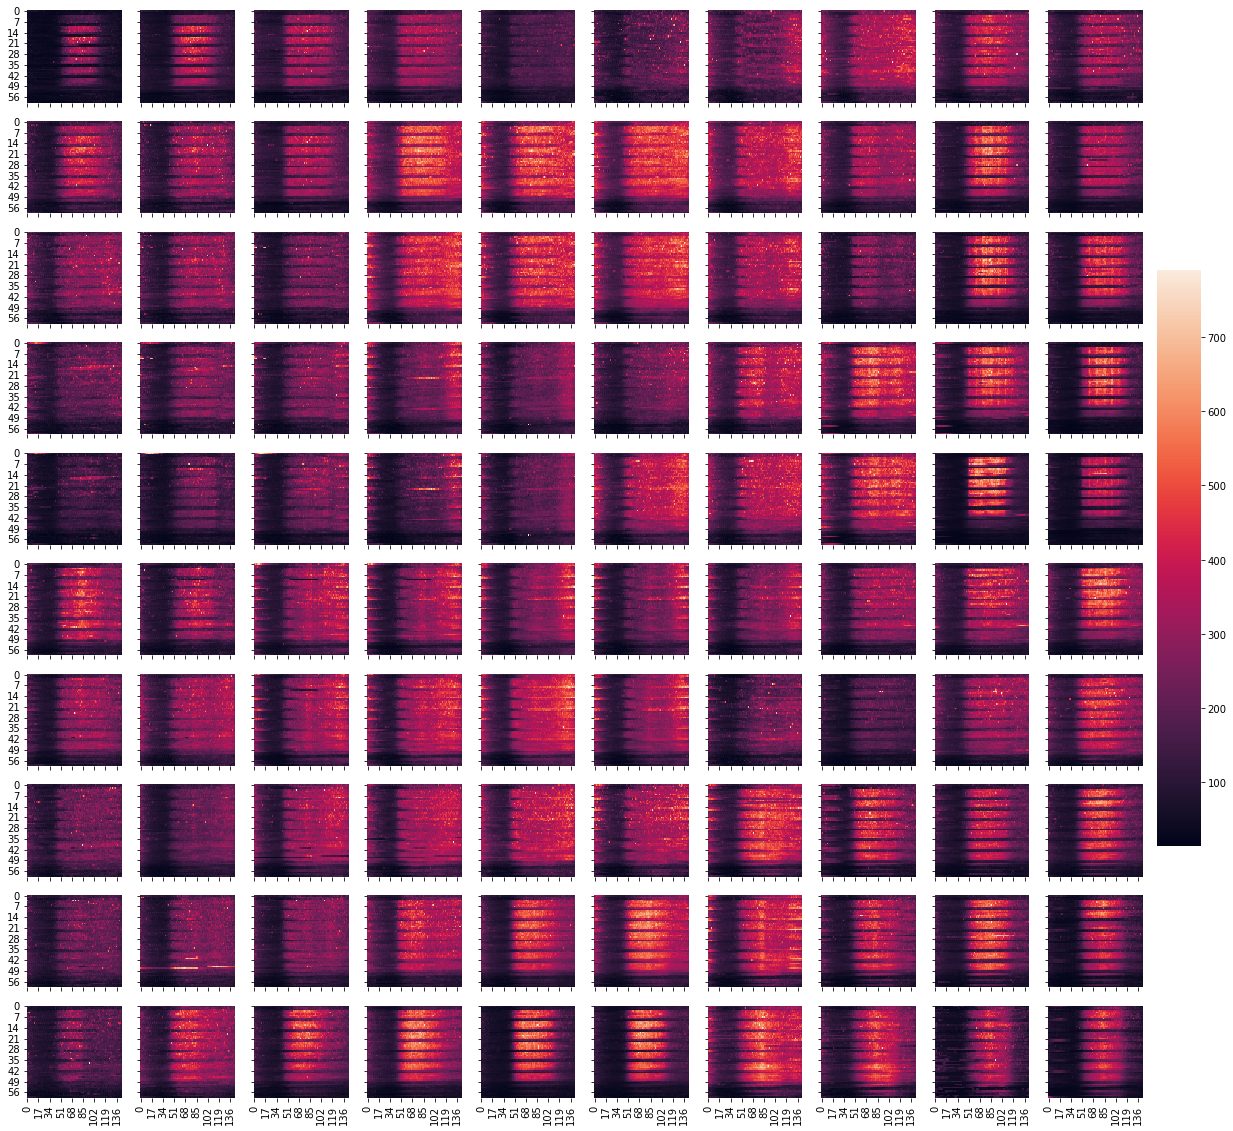

In [12]:
fig, axn = plt.subplots(10, 10, figsize=(20, 20), sharex=True, sharey=True)

cbar_ax = fig.add_axes([.91, .3, .03, .4])

for i, ax in enumerate(axn.flat):
    sns.heatmap(milan_grid_data[:,:,i], ax=ax,
                cbar=i == 0, cbar_ax=None if i else cbar_ax)

fig.show()

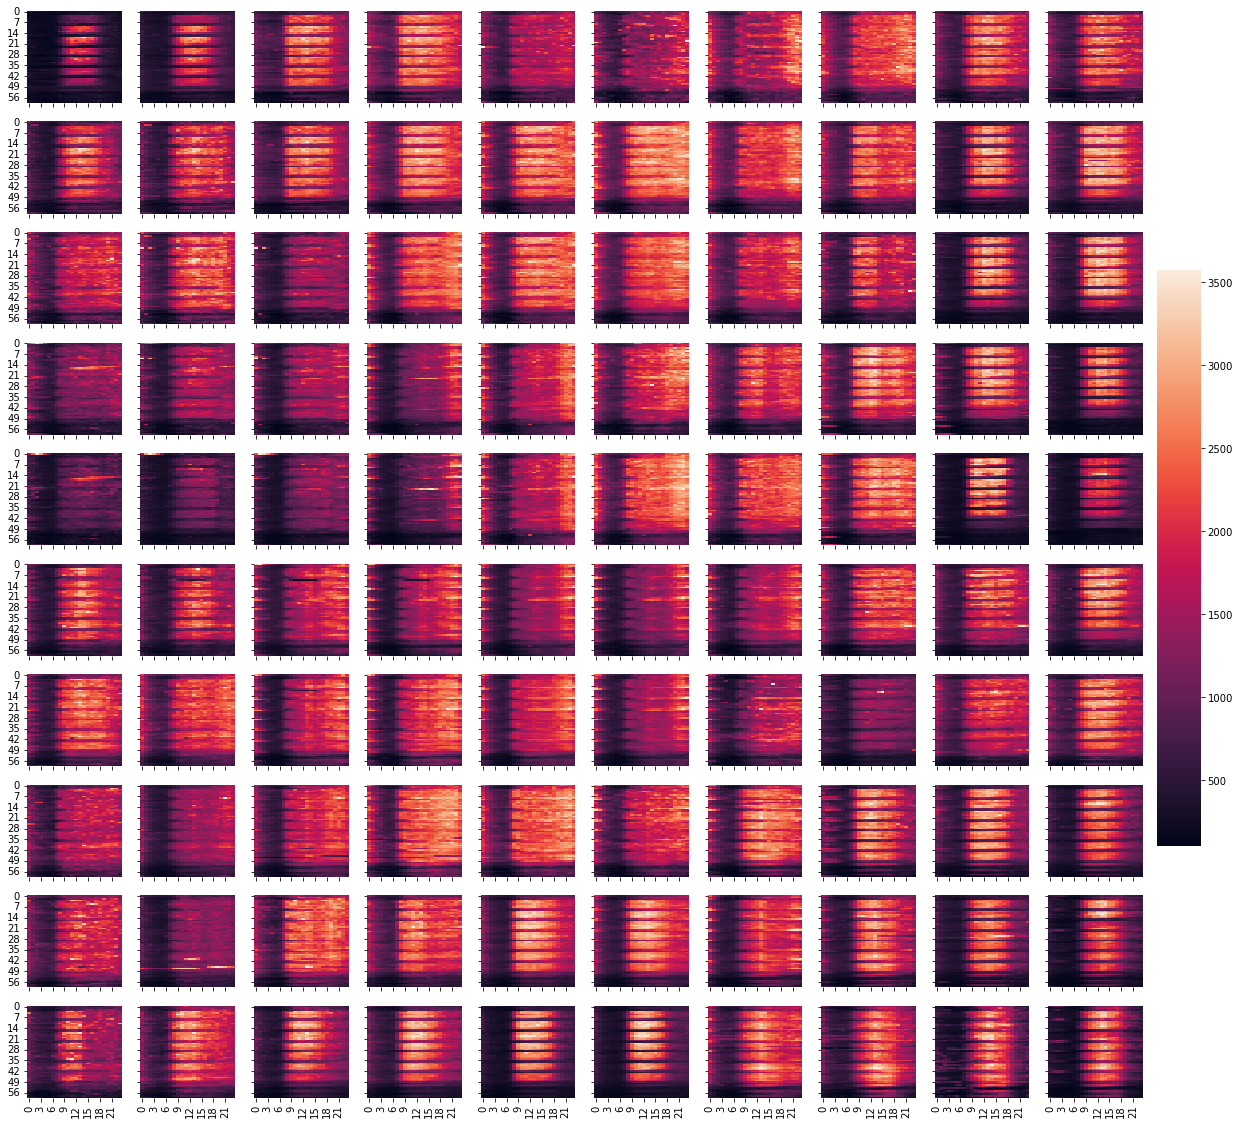

In [13]:
fig, axn = plt.subplots(10, 10, figsize=(20, 20), sharex=True, sharey=True)

cbar_ax = fig.add_axes([.91, .3, .03, .4])

for i, ax in enumerate(axn.flat):
    sns.heatmap(mialn_grid_data_hour[:,:,i], ax=ax,
                cbar=i == 0, cbar_ax=None if i else cbar_ax)

fig.show()